In [1]:
import matplotlib.pyplot as plt                                                                                                                                         # type: ignore
import seaborn as sns                                                                                                                                                   # type: ignore
from sklearn.linear_model import SGDClassifier                                                                                                                          # type: ignore
from sklearn.model_selection import train_test_split                                                                                                                    # type: ignore
from sklearn.metrics import confusion_matrix ,accuracy_score ,f1_score ,recall_score ,precision_score ,precision_recall_fscore_support ,precision_recall_curve          # type: ignore
from sklearn.metrics import classification_report ,roc_curve ,auc ,roc_auc_score ,zero_one_loss                                                                         # type: ignore
#----------------------------------------------------
'''
# sklearn.linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001,l1_ratio=0.15, fit_intercept=True,
                                    max_iter=None,tol=None, shuffle=True, verbose=0, epsilon=0.1,n_jobs=None,
                                    random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5,
                                    early_stopping=False, validation_fraction=0.1,n_iter_no_change=5,
                                    class_weight=None,warm_start=False, average=False, n_iter=None)

# loss = ['squared_epsilon_insensitive', 'squared_hinge', 'perceptron', 'log_loss', 'hinge', 'huber', 'squared_error', 'modified_huber', 'epsilon_insensitive']
# penalty =['elasticnet', 'l2', 'l1']
'''

# SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
# SGDClassifierModel.fit(X_train, y_train)

## Calculating Details:
# print(f'SGDClassifierModel Train Score      = {SGDClassifierModel.score(X_train, y_train)}')
# print(f'SGDClassifierModel Test Score       = {SGDClassifierModel.score(X_test, y_test)}')
# print(f'SGDClassifierModel No. of iterations = {SGDClassifierModel.n_iter_}')
# print('----------------------------------------------------')

## Calculating Prediction:
# y_pred = SGDClassifierModel.predict(X_test)
# print(f'Predicted Value for SGDClassifierModel = {y_pred[:10]}')
# print(f'Actual    Value for SGDClassifierModel = {y_test[:10]}')

"\n# sklearn.linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001,l1_ratio=0.15, fit_intercept=True,\n                                    max_iter=None,tol=None, shuffle=True, verbose=0, epsilon=0.1,n_jobs=None,\n                                    random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5,\n                                    early_stopping=False, validation_fraction=0.1,n_iter_no_change=5,\n                                    class_weight=None,warm_start=False, average=False, n_iter=None)\n\n# loss = ['squared_epsilon_insensitive', 'squared_hinge', 'perceptron', 'log_loss', 'hinge', 'huber', 'squared_error', 'modified_huber', 'epsilon_insensitive']\n# penalty =['elasticnet', 'l2', 'l1']\n"

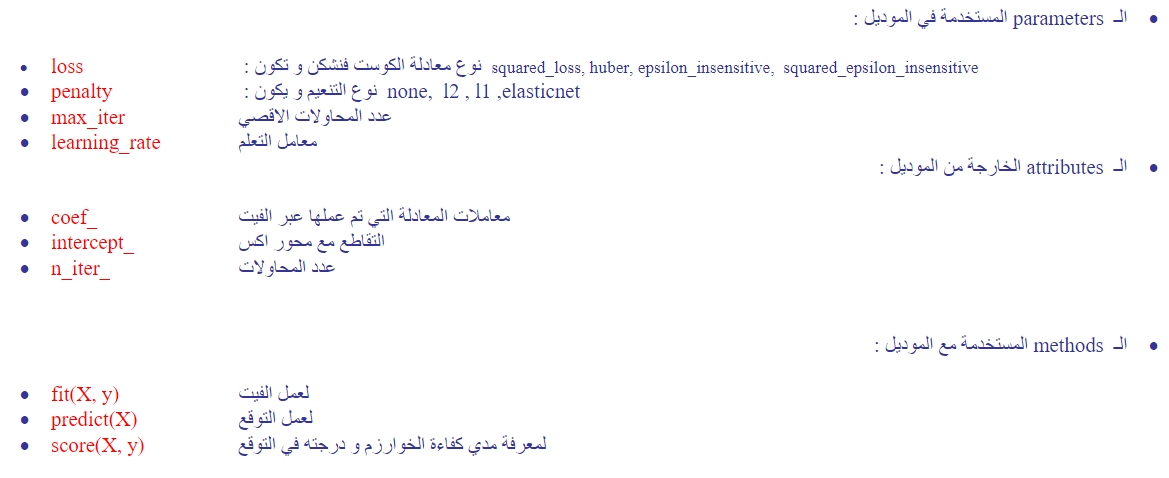

In [2]:
from sklearn.datasets import load_breast_cancer     # type: ignore

X , y = load_breast_cancer(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [4]:
SGDClassifierModel = SGDClassifier(penalty='l1',loss='log_loss',learning_rate='optimal',random_state=33)
SGDClassifierModel.fit(X_train, y_train)

# Calculating Details:
print(f'SGDClassifierModel Train Score       = {SGDClassifierModel.score(X_train, y_train)}')
print(f'SGDClassifierModel Test Score        = {SGDClassifierModel.score(X_test, y_test)}')
print(f'SGDClassifierModel No. of iterations = {SGDClassifierModel.n_iter_}\n')

SGDClassifierModel Train Score       = 0.8713910761154856
SGDClassifierModel Test Score        = 0.8404255319148937
SGDClassifierModel No. of iterations = 35



In [5]:
# Calculating Prediction:
y_pred = SGDClassifierModel.predict(X_test)
print(f'Predicted Value for SGDClassifierModel = {y_pred[:10]}')
print(f'Actual    Value for SGDClassifierModel = {y_test[:10]}')

Predicted Value for SGDClassifierModel = [0 0 1 0 0 0 1 0 0 1]
Actual    Value for SGDClassifierModel = [0 0 1 0 1 1 1 1 0 1]


Confusion Matrix is : 
[[66  2]
 [28 92]]


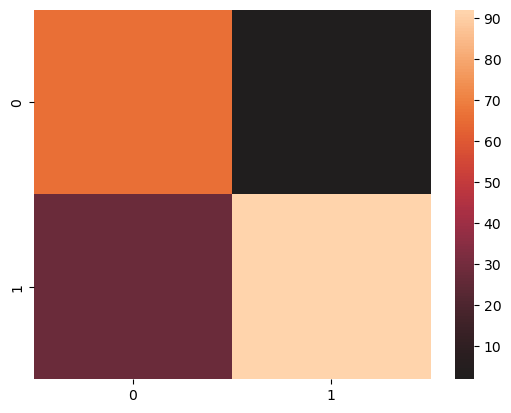

In [6]:
## Calculating Confusion Matrix:
CM = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix is : \n{CM}')

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [7]:
## Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore  = accuracy_score(y_test, y_pred, normalize=False) 
Accpersnt = accuracy_score(y_test, y_pred, normalize=True)   
print(f'Accuracy Score = {AccScore} >> the percentage = {Accpersnt*100:.1f}%')

Accuracy Score = 158.0 >> the percentage = 84.0%


In [8]:
## Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
F1Score = f1_score(y_test, y_pred, average='micro')
print(f'F1 Score = {F1Score}')

F1 Score = 0.8404255319148937


In [9]:
## Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
RecallScore = recall_score(y_test, y_pred, average='micro')
print(f'Recall Score = {RecallScore}')

Recall Score = 0.8404255319148937


In [10]:
## Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
PrecisionScore = precision_score(y_test, y_pred, average='micro')
print(f'Precision Score = {PrecisionScore}')

Precision Score = 0.8404255319148937


In [11]:
## Calculating Precision recall Score :  
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(f'Precision Recall Score = {PrecisionRecallScore}')

Precision Recall Score = (0.8404255319148937, 0.8404255319148937, 0.8404255319148937, None)


In [12]:
## Calculating Precision recall Curve :  
PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print(f'Precision Value  = {PrecisionValue}')
print(f'Recall Value     = {RecallValue}')
print(f'Thresholds Value = {ThresholdsValue}')

Precision Value  = [0.63829787 0.9787234  1.        ]
Recall Value     = [1.         0.76666667 0.        ]
Thresholds Value = [0 1]


In [13]:
## Calculating classification Report :  
ClassificationReport = classification_report(y_test,y_pred)
print(f'Classification Report :\n {ClassificationReport}')

Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.97      0.81        68
           1       0.98      0.77      0.86       120

    accuracy                           0.84       188
   macro avg       0.84      0.87      0.84       188
weighted avg       0.88      0.84      0.84       188



In [14]:
## Calculating Area Under the Curve :  
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print(f'AUC Value = {AUCValue:.3f}')

AUC Value = 0.869


In [15]:
## Calculating Receiver Operating Characteristic :  
fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print(f'fpr Value        = {fprValue}')
print(f'tpr Value        = {tprValue}')
print(f'thresholds Value = {thresholdsValue}')

fpr Value        = [0.         0.02941176 1.        ]
tpr Value        = [0.         0.76666667 1.        ]
thresholds Value = [inf  1.  0.]


In [16]:
## Calculating ROC AUC Score:  
ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro')
print(f'ROCAUC Score = {ROCAUCScore:.3f}')

ROCAUC Score = 0.869


In [17]:
## Calculating Zero One Loss:  
ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False)
print(f'Zero One Loss Value = {ZeroOneLossValue}')

Zero One Loss Value = 30.0
